# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

In [6]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Empty lists 
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


# loops for creating dataframe columns
i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 | east london
Processing Record 2 | upernavik
Processing Record 3 | bloemfontein
Processing Record 4 | dikson
Processing Record 5 | lebu
Processing Record 6 | atuona
Processing Record 7 | pangnirtung
Processing Record 8 | jamestown
Processing Record 9 | cay
Processing Record 10 | ponta do sol
Processing Record 11 | ushuaia
Processing Record 12 | castro
Processing Record 13 | port alfred
Processing Record 14 | butaritari
Processing Record 15 | rozivka
Processing Record 16 | smiths falls
Processing Record 17 | port lincoln
City not found. Skipping...
Processing Record 19 | lagoa
Processing Record 20 | sobolevo
Processing Record 21 | pringsewu
Processing Record 22 | northam
Processing Record 23 | rikitea
Processing Record 24 | provideniya
Processing Record 25 | masallatah
Processing Record 26 | hilo
Processing Record 27 | punta arenas
Processing Record 28 | padang
Processing Record 29 | talcahuano
Processing Recor

In [10]:
#Empty list
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for resp in responses:
    city.append(resp['name'])
    cloudiness.append(resp['clouds']['all'])
    country.append(resp['sys']['country'])
    date.append(resp['dt'])
    humidity.append(resp['main']['humidity'])
    lat.append(resp['coord']['lat'])
    lng.append(resp['coord']['lon'])
    max_temp.append(resp['main']['temp_max'])
    wind_speed.append(resp['wind']['speed'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Dictionary for the Data Frame
citydata = {
    'City': city,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed_list
}

In [12]:
# Display the DataFrame
citydata_df = pd.DataFrame(citydata)

citydata_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,19,ZA,1590075133,28,-33.02,27.91,84.20,5.82
1,Upernavik,0,GL,1590074968,88,72.79,-56.15,33.30,6.46
2,Bloemfontein,0,ZA,1590075042,30,-29.12,26.21,68.00,5.82
3,Dikson,95,RU,1590074961,100,73.51,80.55,40.59,16.87
4,Lebu,20,CL,1590074969,56,-37.62,-73.65,54.81,2.26
5,Atuona,63,PF,1590074961,74,-9.80,-139.03,80.47,14.05
6,Pangnirtung,40,CA,1590074999,79,66.15,-65.71,21.20,5.82
7,Jamestown,1,US,1590074960,48,42.10,-79.24,64.00,12.75
8,Çay,77,TR,1590075280,41,38.59,31.03,71.89,14.76
9,Ponta do Sol,0,PT,1590075127,65,32.67,-17.10,68.00,5.99


In [13]:
citydata_df.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [30]:
citydata_df.to_csv("../output_data/output_data_file")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

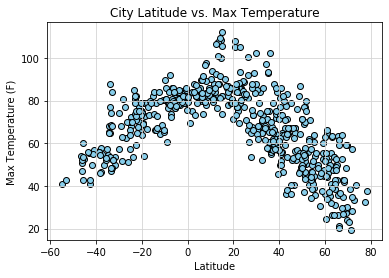

In [34]:
plt.scatter(citydata_df["Lat"],citydata_df["Max Temp"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Lat_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

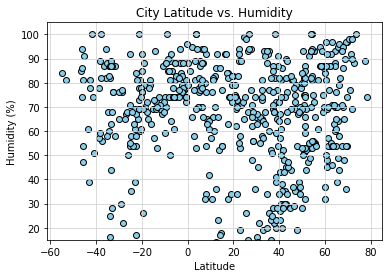

In [35]:
plt.scatter(citydata_df["Lat"],citydata_df["Humidity"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

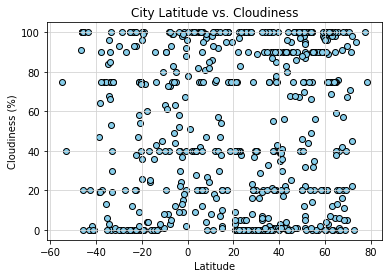

In [37]:
plt.scatter(citydata_df["Lat"],citydata_df["Cloudiness"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Lat_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

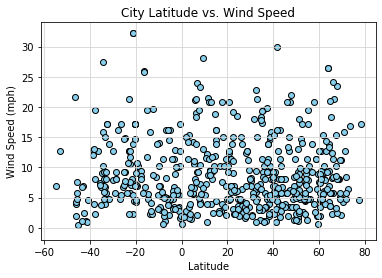

In [38]:
plt.scatter(citydata_df["Lat"],citydata_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Lat_WindSpeed.png")
plt.show()

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots

def linreg(df, y_column_name, y_label, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue}")
    
    plt.show()

In [47]:
# Create Northern and Southern Hemisphere DataFrames
n_hemisphere_df = citydata_df.loc[citydata_df['Lat'] > 0, :]
s_hemisphere_df = citydata_df.loc[citydata_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8047170196419905


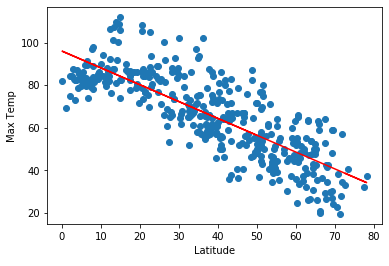

In [53]:
linreg(n_hemisphere_df, 'Max Temp', 'Max Temp', (10,0))

#The r-squared is: -0.8047170196419905

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.794569446238106


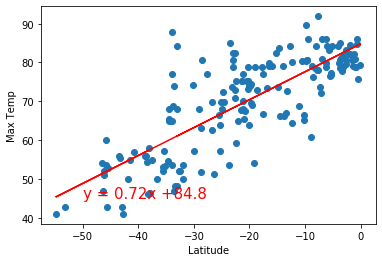

In [81]:
linreg(s_hemisphere_df, 'Max Temp', 'Max Temp', (-50,45))
#The r-squared is: 0.794569446238106

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.086654324037009


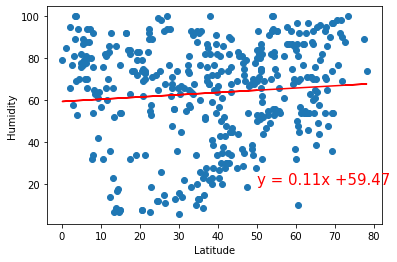

In [80]:
linreg(n_hemisphere_df, 'Humidity', 'Humidity', (50,20))
#The r-squared is: 0.086654324037009

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1809827935899257


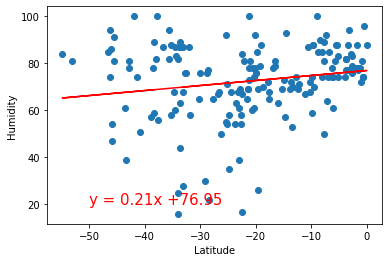

In [79]:
linreg(s_hemisphere_df, 'Humidity', 'Humidity', (-50,20))
#The r-squared is: 0.1809827935899257

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.045248599834199016


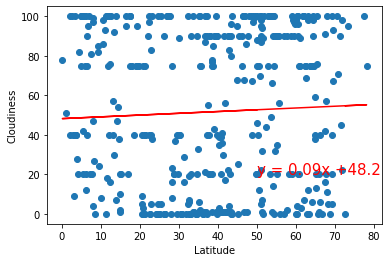

In [78]:
linreg(n_hemisphere_df, 'Cloudiness', 'Cloudiness', (50,20))
#The r-squared is: 0.045248599834199016

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029257633187131395


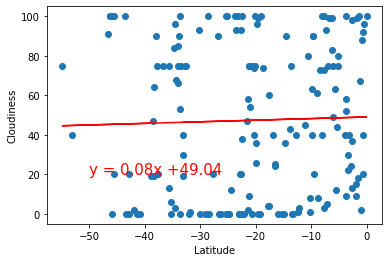

In [77]:
linreg(s_hemisphere_df, 'Cloudiness', 'Cloudiness', (-50,20))
#The r-squared is: 0.029257633187131395

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.04673912680686207


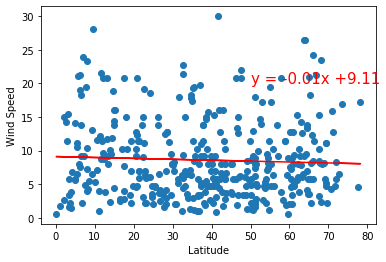

In [76]:
linreg(n_hemisphere_df, 'Wind Speed', 'Wind Speed', (50,20))
#The r-squared is: -0.04673912680686207

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.06108599452934377


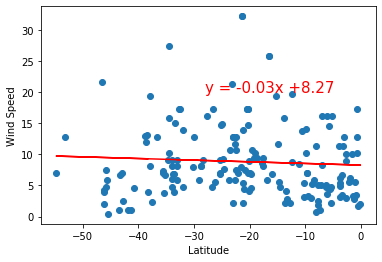

In [75]:
linreg(s_hemisphere_df, 'Wind Speed', 'Wind Speed', (-28,20))
#The r-squared is: -0.06108599452934377